## Random bidding strategy 2: testing ranges around the mean

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

#Import validation and testing data sets
rtb_train = pd.read_csv("train.csv")
rtb_train_cropped = rtb_train[['payprice','click','bidprice']]
rtb_validation = pd.read_csv("validation.csv")
rtb_validation_cropped = rtb_validation[['payprice','click']]

In [2]:
#Determine bid prices boundaries with Standard deviation intervalls
meanPayPrice = rtb_validation_cropped['payprice'].mean()
payPriceStd = rtb_validation_cropped['payprice'].std()
print(meanPayPrice)
print(payPriceStd)
maxPrice = (rtb_train_cropped.loc[:,"payprice"].max())
minPrice = (rtb_train_cropped.loc[:,"payprice"].min())


78.23400509994242
60.026062850969545


In [7]:
#Starting point is the mean of the clicked impressions pay price
constantPrice = 65
bidPriceListUpperBound = []
bidPriceListLowerBound = []
count = 0

#Determine upper bid price boundaries for the constant bid range
while (count < 40):
    constantPrice +=1
    bidPriceListUpperBound.append(constantPrice)
    count = count +1
    
numberBids = []
wonBids = []
CTR = [] 
numberClicks = [] 
CPC = [] 
CPM = []
eCPC = []

#Repeating bidding in validation set j times
for j in range (0,len(bidPriceListUpperBound)):
    budget = 6250
    bids = 0
    impressions = 0
    clicks = 0
    
    #Creates an array of random bid prices in the boundaries declared above
    randomBids = []
    for i in range(0,len(rtb_validation)):
        bid = random.randrange(minPrice,bidPriceListUpperBound[j],1)
        randomBids.append(bid)
    
    rtb_validation['random_bids'] = randomBids
    
    for i in range(0,len(rtb_validation_cropped)):
        if budget > 0 and budget > (rtb_validation_cropped['payprice'].values[i]/1000):
            impressions += 1
            if (rtb_validation['random_bids'].values[i]/1000) > (rtb_validation_cropped['payprice'].values[i]/1000):
                bids += 1
                clicks += rtb_validation_cropped['click'].values[i]
                budget = budget - (rtb_validation_cropped['payprice'].values[i]/1000)
        else: 
            print("Budget is spent!")
            break
    ctr = (clicks/impressions)*100    
    cpm = 6250/impressions
    cpc = 6250/clicks
        #Output for the alrogithm
    print("Output")
    print(bidPriceListUpperBound[j])
    numberBids.append(impressions)
    print(numberBids)
    wonBids.append(bids)
    print(wonBids)
    CTR.append(ctr)
    print(CTR)
    numberClicks.append(clicks)
    print(numberClicks)
    CPC.append(cpc)
    print(CPC)
    CPM.append(cpm)
    print(CPM)

Output
66
[303925]
[70104]
[0.006251542321296372]
[19]
[328.94736842105266]
[0.020564283951632803]
Output
67
[303925, 303925]
[70104, 71455]
[0.006251542321296372, 0.005264456691617998]
[19, 16]
[328.94736842105266, 390.625]
[0.020564283951632803, 0.020564283951632803]
Output
68
[303925, 303925, 303925]
[70104, 71455, 72374]
[0.006251542321296372, 0.005264456691617998, 0.008225713580653122]
[19, 16, 25]
[328.94736842105266, 390.625, 250.0]
[0.020564283951632803, 0.020564283951632803, 0.020564283951632803]
Output
69
[303925, 303925, 303925, 303925]
[70104, 71455, 72374, 73856]
[0.006251542321296372, 0.005264456691617998, 0.008225713580653122, 0.008225713580653122]
[19, 16, 25, 25]
[328.94736842105266, 390.625, 250.0, 250.0]
[0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803]
Output
70
[303925, 303925, 303925, 303925, 303925]
[70104, 71455, 72374, 73856, 74791]
[0.006251542321296372, 0.005264456691617998, 0.008225713580653122, 0.008225713580653122, 0.

Output
80
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[70104, 71455, 72374, 73856, 74791, 75870, 77178, 78315, 80021, 81259, 82414, 83932, 85025, 86279, 87376]
[0.006251542321296372, 0.005264456691617998, 0.008225713580653122, 0.008225713580653122, 0.00888377066710537, 0.007567656494200871, 0.008554742123879246, 0.009870856296783746, 0.009870856296783746, 0.009212799210331496, 0.010857941926462122, 0.00888377066710537, 0.01151599901291437, 0.009870856296783746, 0.010857941926462122]
[19, 16, 25, 25, 27, 23, 26, 30, 30, 28, 33, 27, 35, 30, 33]
[328.94736842105266, 390.625, 250.0, 250.0, 231.4814814814815, 271.7391304347826, 240.3846153846154, 208.33333333333334, 208.33333333333334, 223.21428571428572, 189.3939393939394, 231.4814814814815, 178.57142857142858, 208.33333333333334, 189.3939393939394]
[0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020

Output
86
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[70104, 71455, 72374, 73856, 74791, 75870, 77178, 78315, 80021, 81259, 82414, 83932, 85025, 86279, 87376, 88733, 90399, 91738, 93076, 94244, 95846]
[0.006251542321296372, 0.005264456691617998, 0.008225713580653122, 0.008225713580653122, 0.00888377066710537, 0.007567656494200871, 0.008554742123879246, 0.009870856296783746, 0.009870856296783746, 0.009212799210331496, 0.010857941926462122, 0.00888377066710537, 0.01151599901291437, 0.009870856296783746, 0.010857941926462122, 0.011845027556140496, 0.01151599901291437, 0.012503084642592744, 0.011186970469688246, 0.010528913383235996, 0.01217405609936662]
[19, 16, 25, 25, 27, 23, 26, 30, 30, 28, 33, 27, 35, 30, 33, 36, 35, 38, 34, 32, 37]
[328.94736842105266, 390.625, 250.0, 250.0, 231.4814814814815, 271.7391304347826, 240.3846153846154, 208.33333333333334, 208.33333

Output
91
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[70104, 71455, 72374, 73856, 74791, 75870, 77178, 78315, 80021, 81259, 82414, 83932, 85025, 86279, 87376, 88733, 90399, 91738, 93076, 94244, 95846, 96962, 98023, 99349, 100931, 102164]
[0.006251542321296372, 0.005264456691617998, 0.008225713580653122, 0.008225713580653122, 0.00888377066710537, 0.007567656494200871, 0.008554742123879246, 0.009870856296783746, 0.009870856296783746, 0.009212799210331496, 0.010857941926462122, 0.00888377066710537, 0.01151599901291437, 0.009870856296783746, 0.010857941926462122, 0.011845027556140496, 0.01151599901291437, 0.012503084642592744, 0.011186970469688246, 0.010528913383235996, 0.01217405609936662, 0.014477255901949494, 0.012832113185818872, 0.016122398618080118, 0.011845027556140496, 0.01151599901291437]
[19, 16, 25, 25, 27, 23, 26, 

Output
95
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[70104, 71455, 72374, 73856, 74791, 75870, 77178, 78315, 80021, 81259, 82414, 83932, 85025, 86279, 87376, 88733, 90399, 91738, 93076, 94244, 95846, 96962, 98023, 99349, 100931, 102164, 103466, 104808, 106156, 106897]
[0.006251542321296372, 0.005264456691617998, 0.008225713580653122, 0.008225713580653122, 0.00888377066710537, 0.007567656494200871, 0.008554742123879246, 0.009870856296783746, 0.009870856296783746, 0.009212799210331496, 0.010857941926462122, 0.00888377066710537, 0.01151599901291437, 0.009870856296783746, 0.010857941926462122, 0.011845027556140496, 0.01151599901291437, 0.012503084642592744, 0.011186970469688246, 0.010528913383235996, 0.01217405609936662, 0.014477255901949494, 0.012832113185818872, 0.016122398618080118, 0.011845

Output
99
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[70104, 71455, 72374, 73856, 74791, 75870, 77178, 78315, 80021, 81259, 82414, 83932, 85025, 86279, 87376, 88733, 90399, 91738, 93076, 94244, 95846, 96962, 98023, 99349, 100931, 102164, 103466, 104808, 106156, 106897, 108273, 109635, 110722, 112225]
[0.006251542321296372, 0.005264456691617998, 0.008225713580653122, 0.008225713580653122, 0.00888377066710537, 0.007567656494200871, 0.008554742123879246, 0.009870856296783746, 0.009870856296783746, 0.009212799210331496, 0.010857941926462122, 0.00888377066710537, 0.01151599901291437, 0.009870856296783746, 0.010857941926462122, 0.011845027556140496, 0.01151599901291437, 0.012503084642592744, 0.011186970469688246, 0.010528913383235996, 0.01217405609936662, 0.01447725

Output
102
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[70104, 71455, 72374, 73856, 74791, 75870, 77178, 78315, 80021, 81259, 82414, 83932, 85025, 86279, 87376, 88733, 90399, 91738, 93076, 94244, 95846, 96962, 98023, 99349, 100931, 102164, 103466, 104808, 106156, 106897, 108273, 109635, 110722, 112225, 113214, 114134, 115760]
[0.006251542321296372, 0.005264456691617998, 0.008225713580653122, 0.008225713580653122, 0.00888377066710537, 0.007567656494200871, 0.008554742123879246, 0.009870856296783746, 0.009870856296783746, 0.009212799210331496, 0.010857941926462122, 0.00888377066710537, 0.01151599901291437, 0.009870856296783746, 0.010857941926462122, 0.011845027556140496, 0.01151599901291437, 0.012503084642592744, 0.011186970469688246, 0.01

Output
105
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[70104, 71455, 72374, 73856, 74791, 75870, 77178, 78315, 80021, 81259, 82414, 83932, 85025, 86279, 87376, 88733, 90399, 91738, 93076, 94244, 95846, 96962, 98023, 99349, 100931, 102164, 103466, 104808, 106156, 106897, 108273, 109635, 110722, 112225, 113214, 114134, 115760, 116904, 117618, 118513]
[0.006251542321296372, 0.005264456691617998, 0.008225713580653122, 0.008225713580653122, 0.00888377066710537, 0.007567656494200871, 0.008554742123879246, 0.009870856296783746, 0.009870856296783746, 0.009212799210331496, 0.010857941926462122, 0.00888377066710537, 0.01151599901291437, 0.009870856296783746, 0.010857941926462122, 0.011845027556140496, 0.01151599901291437, 

In [8]:
#Store summary statistics in a dataframe and plot graphs for each of them
summaryStatistics = pd.DataFrame({
    'Constant bid price': bidPriceListUpperBound,
    'numberBids': numberBids,
    'wonBids': wonBids,
    'CTR': CTR,
    'Clicks': numberClicks,
    'eCPC': CPC, 
    'CPM': CPM,
})
print(summaryStatistics)

         CPM       CTR  Clicks  Constant bid price        eCPC  numberBids  \
0   0.020564  0.006252      19                  66  328.947368      303925   
1   0.020564  0.005264      16                  67  390.625000      303925   
2   0.020564  0.008226      25                  68  250.000000      303925   
3   0.020564  0.008226      25                  69  250.000000      303925   
4   0.020564  0.008884      27                  70  231.481481      303925   
5   0.020564  0.007568      23                  71  271.739130      303925   
6   0.020564  0.008555      26                  72  240.384615      303925   
7   0.020564  0.009871      30                  73  208.333333      303925   
8   0.020564  0.009871      30                  74  208.333333      303925   
9   0.020564  0.009213      28                  75  223.214286      303925   
10  0.020564  0.010858      33                  76  189.393939      303925   
11  0.020564  0.008884      27                  77  231.481481  

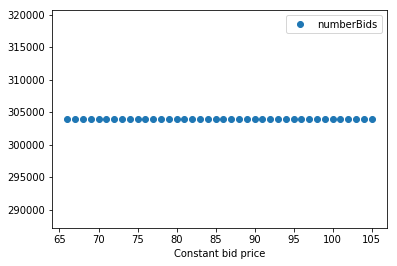

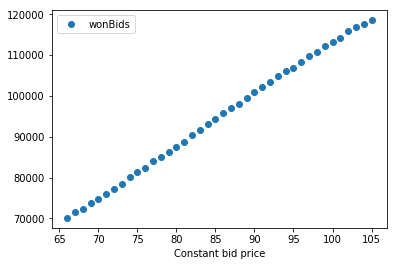

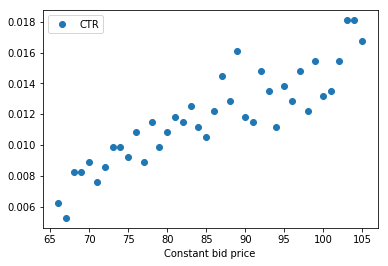

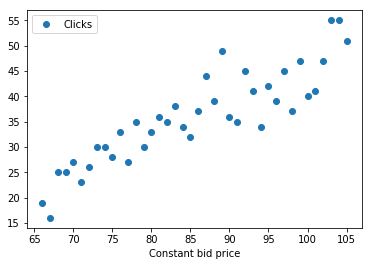

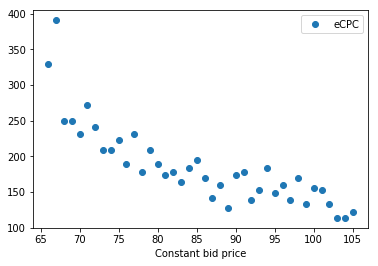

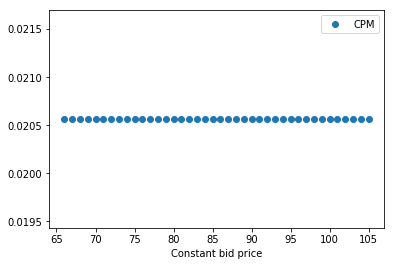

In [9]:
summaryStatistics.plot(x='Constant bid price', y='numberBids', style='o'); summaryStatistics.plot(x='Constant bid price', y='wonBids', style='o')
summaryStatistics.plot(x='Constant bid price', y='CTR', style='o')
summaryStatistics.plot(x='Constant bid price', y='Clicks', style='o')
summaryStatistics.plot(x='Constant bid price', y='eCPC', style='o')
summaryStatistics.plot(x='Constant bid price', y='CPM', style='o')

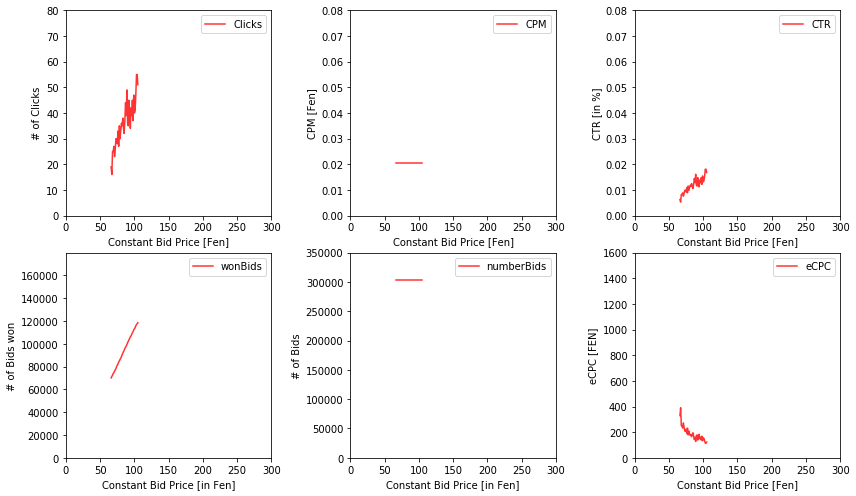

In [10]:
# VALIDATION SET - Budget of 6250
# plt.figure()
fig, axes = plt.subplots(nrows= 2, ncols = 3, figsize=(12,7) )


#Clicks - 1
ax1= summaryStatistics.plot(ax=axes[0,0],x='Constant bid price', y='Clicks',color ='red', alpha = 0.8)
ax1.set_ylabel('# of Clicks')
ax1.set_xlabel('Constant Bid Price [Fen]')
ax1.set_xticks(np.arange(0,305,50))
ax1.set_yticks(np.arange(0,100,10))
ax1.set_ylim(top=80)
# ymax = summaryStatistics['Clicks'].max()
# xpos = numberClicks.index(ymax)
# xmax = summaryStatistics.iloc[xpos]['Constant bid price']
# ax1.annotate('local max', xy=(80,68), xytext=(80,73),
# arrowprops=dict(facecolor='black', shrink=0.05),)

#Impressions won - 2
ax2= summaryStatistics.plot(ax=axes[0,1],x='Constant bid price', y='CPM',color ='red', alpha = 0.8)
ax2.set_ylabel('CPM [Fen]')
ax2.set_xlabel('Constant Bid Price [Fen]')
ax2.set_xticks(np.arange(0,305,50))
ax2.set_yticks(np.arange(0,0.1,0.01))
ax2.set_ylim(top=0.08)

#Win ratio - 3
ax3= summaryStatistics.plot(ax=axes[0,2],x='Constant bid price', y='CTR',color ='red', alpha = 0.8)
ax3.set_ylabel('CTR [in %]')
ax3.set_xlabel('Constant Bid Price [Fen]')
ax3.set_xticks(np.arange(0,305,50))
ax3.set_yticks(np.arange(0,0.1,0.01))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax3.set_ylim(top=0.08)

#CTR -  4
ax4= summaryStatistics.plot(ax=axes[1,0],x='Constant bid price', y='wonBids',color ='red', alpha = 0.8)
ax4.set_ylabel('# of Bids won')
ax4.set_xlabel('Constant Bid Price [in Fen]')
ax4.set_xticks(np.arange(0,305,50))
ax4.set_yticks(np.arange(0,180000,20000))
ax4.set_ylim(top=180000)

#CPM - 5
ax5= summaryStatistics.plot(ax=axes[1,1],x='Constant bid price', y='numberBids',color ='red', alpha = 0.8)
ax5.set_ylabel('# of Bids')
ax5.set_xlabel('Constant Bid Price [in Fen]')
ax5.set_xticks(np.arange(0,305,50))
ax5.set_yticks(np.arange(0,1000000,50000))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax5.set_ylim(top=350000)

#eCPC - 6
ax6= summaryStatistics.plot(ax=axes[1,2],x='Constant bid price', y='eCPC',color ='red', alpha = 0.8)
ax6.set_ylabel('eCPC [FEN]')
ax6.set_xlabel('Constant Bid Price [Fen]')
ax6.set_xticks(np.arange(0,305,50))
ax6.set_yticks(np.arange(0,1800,200))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax6.set_ylim(top=1600)

plt.tight_layout(h_pad = 0.2)

#Save image
plt.savefig('numberBids.pdf',bbox_inches='tight')